# Spectral Analysis with SMOL

This notebook demonstrates how to query and analyze spectral properties from the SMOL database.

SMOL provides precomputed eigenvalues for 7 matrix types across ~12.3M graphs.

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import requests
from urllib.parse import quote

BASE_URL = "https://smol-graphs-db.fly.dev"

## Querying Graphs from SMOL

Let's look up some well-known graphs and their spectral properties.

In [ ]:
examples = {
    'K5': 'D~{',           # Complete graph K_5
    'C6': 'E?Bw',          # 6-cycle
    'K33': 'EFz_',         # Complete bipartite K_{3,3}
    'Petersen': 'IsP@PGXD_',
}

# Query SMOL for these graphs
graphs = {}
for name, g6 in examples.items():
    encoded = quote(g6, safe="")
    response = requests.get(f"{BASE_URL}/graph/{encoded}")
    graphs[name] = response.json()

for name, data in graphs.items():
    print(f"{name}: {data['n']} vertices, {data['m']} edges, tags: {data.get('tags', [])}")

## Exploring Spectra

SMOL provides eigenvalues for all 7 matrix types. Let's extract adjacency and Kirchhoff Laplacian spectra.

In [ ]:
spectra = {}
for name, data in graphs.items():
    spectra[name] = {
        'adj': data['spectra']['adj_eigenvalues'],
        'kirchhoff': data['spectra']['kirchhoff_eigenvalues']
    }

print("K5 adjacency eigenvalues:", np.round(spectra['K5']['adj'], 4))
print("K5 Kirchhoff Laplacian eigenvalues:", np.round(spectra['K5']['kirchhoff'], 4))

## Visualizing Spectra

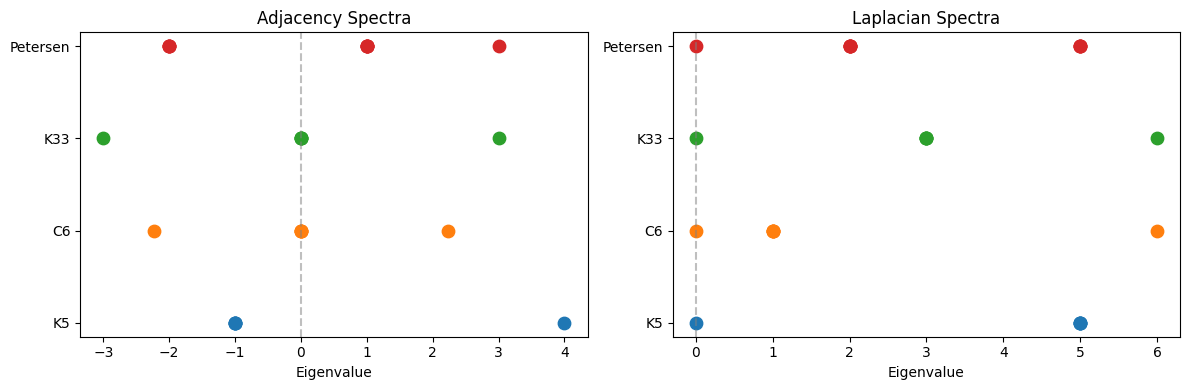

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for i, (name, spec) in enumerate(spectra.items()):
    axes[0].scatter(spec['adj'], [i]*len(spec['adj']), s=80, label=name)
    axes[1].scatter(spec['lap'], [i]*len(spec['lap']), s=80, label=name)

for ax, title in zip(axes, ['Adjacency Spectra', 'Laplacian Spectra']):
    ax.set_yticks(range(len(graphs)))
    ax.set_yticklabels(list(graphs.keys()))
    ax.set_xlabel('Eigenvalue')
    ax.set_title(title)
    ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Key Spectral Invariants

- **Spectral radius**: largest adjacency eigenvalue magnitude
- **Algebraic connectivity**: second-smallest Laplacian eigenvalue

In [ ]:
print(f"{'Graph':<12} {'Spectral Radius':<18} {'Algebraic Conn.':<18}")
print("-" * 48)
for name, data in graphs.items():
    adj_eigs = data['spectra']['adj_eigenvalues']
    rho = max(abs(e) for e in adj_eigs)
    alg_conn = data['properties'].get('algebraic_connectivity', 0.0)
    print(f"{name:<12} {rho:<18.4f} {alg_conn:<18.4f}")